#### EP4130: Data Science Analysis

#### Assignment 5

#### Ranveer Sahu - es21btech11025

*****

All imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from scipy import stats

**Question 1**

Take the dataset from https://astrostatistics.psu.edu/datasets/asteroid_dens.dat, and apply the Shapiro-Wilk test to the densities and the log of the densities. From the p-values, which of these is closer to a Gaussian? Verify this by plotting the histograms of both density and logarithms of the densities and overlay the best-fit Gaussian Distribution.

In [2]:
data = np.array([[1, 2.12, 0.04], [2, 2.71, 0.11], [4, 3.44, 0.12],
[10, 2.76, 1.20], [11, 2.72, 0.12], [15, 0.96, 0.30],
[16, 2.00, 0.60], [20, 3.26, 0.60], [22, 2.50, 0.30],
[45, 1.20, 0.40], [87, 1.62, 0.30], [90, 1.30, 0.0],
[121, 1.96, 0.34], [243, 2.60, 0.50], [253, 1.30, 0.20],
[433, 2.67, 0.03], [704, 4.40, 2.10], [762, 1.80, 0.80],
[804, 4.90, 3.90], [1999, 2.39, 0.90], [2000, 1.62, 1.05],
[2000, 1.47, 0.95], [854, 0.89, 0.13], [1089, 2.52, 0.30],
[1313, 1.21, 0.25], [4492, 0.90, 0.10], [617, 0.80, 0.15]])

density_values = data[: , 1]

In [3]:
statistics1, pvalue1 = stats.shapiro(density_values)
mu1, sigma1 = stats.norm.fit(density_values)

In [4]:
print('shapiro-walk test -> density values :','w =', statistics1, 'p_val =', pvalue1 )

shapiro-walk test -> density values : w = 0.9246721863746643 p_val = 0.051220282912254333


In [5]:
statistics2, pvalue2= stats.shapiro(np.log(density_values))
mu2, sigma2 = stats.norm.fit(np.log(density_values))

In [6]:
print('shapiro-walk test --> natural_log density values :','w =', statistics2, 'p_val =', pvalue2 )

shapiro-walk test --> natural_log density values : w = 0.9686306715011597 p_val = 0.5660613775253296


**Ploting**

In [7]:
x = np.linspace(-2 , 6 , 100)
pdf1 = stats.norm.pdf(x, mu1, sigma1)
pdf2 = stats.norm.pdf(x, mu2, sigma2)

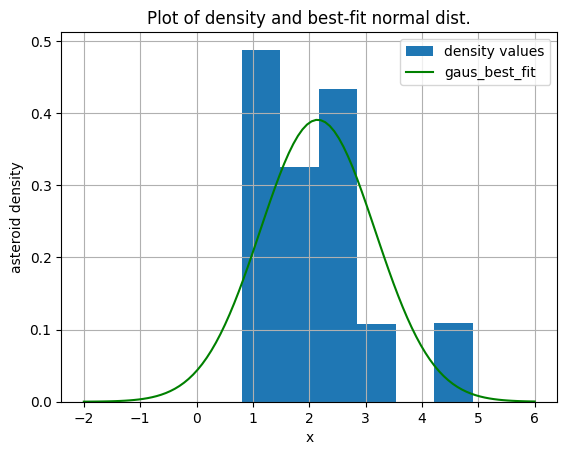

In [8]:
# plot 1
plt.figure()
plt.hist(density_values, density = True, bins='auto', alpha = 1, label='density values')
plt.plot(x, pdf1, label='gaus_best_fit', color='g')
plt.title('Plot of density and best-fit normal dist.')
plt.xlabel('x')
plt.ylabel('asteroid density')
plt.legend(loc='best')
plt.grid()
plt.show()

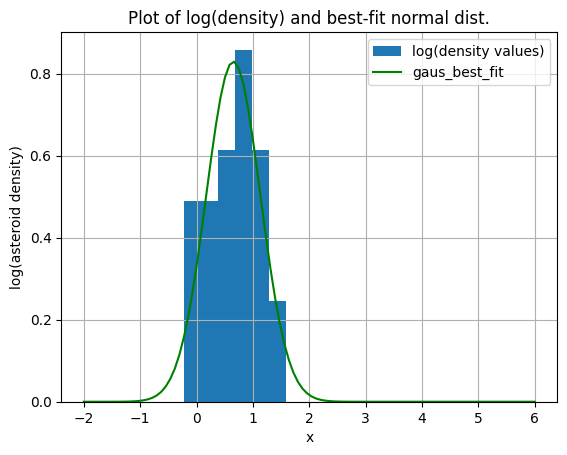

In [9]:
# plot 2
plt.figure()
plt.hist(np.log(density_values), density = True, bins='auto', alpha=1, label='log(density values)')
plt.plot(x, pdf2, label='gaus_best_fit', color='g')
plt.title('Plot of log(density) and best-fit normal dist.')
plt.xlabel('x')
plt.ylabel('log(asteroid density)')
plt.legend(loc='best')
plt.grid()
plt.show()

Clearly, According to the p-values, the logarithms of the densities are more likely to belong to normal distribution.

*****

**Question 2**

Download the Hipparcos star catalog from http://iith.ac.in/~shantanud/HIP_star.dat. Detailed explanation of the columns in this dataset can be found in http://astrostatistics.psu.edu/datasets/HIP_star.html under “Dataset”. Calculate using two-sample t-test whether the color (B-V) of the Hyades stars differs from the non-Hyades ones. The Hyades stars have Right Ascension between 50◦ and 100◦ , declinations between 0 and 25◦ , proper motion in RA between 90 and 130 mas/year, proper motion in DEC between -60 and -10 mas/year. Any other star which does not satisfy any of the above conditions is considered a non-Hyades star.


In [10]:
data = pd.read_csv("HIP_star.dat.csv" , sep = " ")
data

,HIP,Vmag,RA,DE,Plx,pmRA,pmDE,e_Plx,B-V
0,2,9.27,0.003797,-19.498837,21.90,181.21,-0.93,3.10,0.999
1,38,8.65,0.111047,-79.061831,23.84,162.30,-62.40,0.78,0.778
2,47,10.78,0.135192,-56.835248,24.45,-44.21,-145.90,1.97,1.150
3,54,10.57,0.151656,17.968956,20.97,367.14,-19.49,1.71,1.030
4,74,9.93,0.221873,35.752722,24.22,157.73,-40.31,1.36,1.068
...,...,...,...,...,...,...,...,...,...
2714,118207,8.38,359.662248,77.262113,23.37,18.87,-44.04,0.70,0.651
2715,118213,8.28,359.690763,31.939823,20.33,76.66,-134.59,0.94,0.734
2716,118251,8.16,359.778318,41.170547,22.91,82.20,3.56,0.82,0.652
2717,118254,7.72,359.787381,41.201736,22.19,80.21,4.40,0.80,0.563


In [11]:
hyades = data[(data['RA'] >= 50) & (data['RA'] <= 100) & (data['DE'] >= 0) & (data['DE'] <= 25) & \
    (data['pmRA'] >= 90) & (data['pmRA'] <= 130) & (data['pmDE'] >= -60) & (data['pmDE'] <= -10)]
hyades

,HIP,Vmag,RA,DE,Plx,pmRA,pmDE,e_Plx,B-V
532,18735,5.89,60.202858,18.194069,21.99,129.49,-28.27,0.81,0.319
536,18946,10.12,60.912353,19.455094,23.07,119.02,-34.19,2.12,1.095
540,19148,7.85,61.566899,15.698168,21.41,118.53,-19.59,1.47,0.593
542,19207,10.49,61.754794,15.335078,23.57,122.63,-18.96,2.26,1.180
544,19261,6.02,61.924609,15.162843,21.27,127.06,-22.75,1.03,0.397
...,...,...,...,...,...,...,...,...,...
679,21762,9.47,70.105891,16.513734,23.65,91.94,-30.69,2.53,1.096
688,22044,5.39,71.107373,11.146169,20.73,98.87,-13.47,0.88,0.251
694,22224,9.60,71.705813,17.748406,24.11,96.93,-33.93,1.72,0.967
704,22496,7.10,72.599450,17.202738,22.96,102.78,-29.70,1.17,0.563


In [12]:
non_hyades = data[~data.index.isin(hyades.index)]
non_hyades

,HIP,Vmag,RA,DE,Plx,pmRA,pmDE,e_Plx,B-V
0,2,9.27,0.003797,-19.498837,21.90,181.21,-0.93,3.10,0.999
1,38,8.65,0.111047,-79.061831,23.84,162.30,-62.40,0.78,0.778
2,47,10.78,0.135192,-56.835248,24.45,-44.21,-145.90,1.97,1.150
3,54,10.57,0.151656,17.968956,20.97,367.14,-19.49,1.71,1.030
4,74,9.93,0.221873,35.752722,24.22,157.73,-40.31,1.36,1.068
...,...,...,...,...,...,...,...,...,...
2714,118207,8.38,359.662248,77.262113,23.37,18.87,-44.04,0.70,0.651
2715,118213,8.28,359.690763,31.939823,20.33,76.66,-134.59,0.94,0.734
2716,118251,8.16,359.778318,41.170547,22.91,82.20,3.56,0.82,0.652
2717,118254,7.72,359.787381,41.201736,22.19,80.21,4.40,0.80,0.563


In [13]:
hyad_colrs = np.array(hyades['B-V'].tolist())
non_hyades_colors = np.array(non_hyades['B-V'].tolist())

In [14]:
print('The p-value for the null hypothesis that the color of Haydes stars and non-Haydes stars have identical means is {}'.\
    format(sp.stats.ttest_ind(hyad_colrs , non_hyades_colors)[1]))

The p-value for the null hypothesis that the color of Haydes stars and non-Haydes stars have identical means is 0.00011582222192442334


Since the p-value is very small, the colors of the two kinds of stars are not very similar.

*****

**Question 3**

The T90 distribution for Beppo-Sax T90 data can be found at http://www.iith.ac.in/~shantanud/beppoSax.txt. Apply GMM to log10 of T90 data and find the optimum number of components using AIC and BIC by plotting BIC as a function of number of componts (Hint: Look at the source code for astroML figure 6.6)

In [15]:
from sklearn.mixture import GaussianMixture
data = np.genfromtxt("bappoSax.csv")

In [16]:
log_data = np.log10(data)
log_data = log_data.reshape(-1 , 1)

In [17]:
n_components = np.arange(1 , 21)
models = []
AIC = []
BIC = []
for n in n_components:
    models.append(GaussianMixture(n_components = n , max_iter = 1000).fit(log_data))
    AIC.append(models[-1].aic(log_data))
    BIC.append(models[-1].bic(log_data))

Plotting AIC and BIC

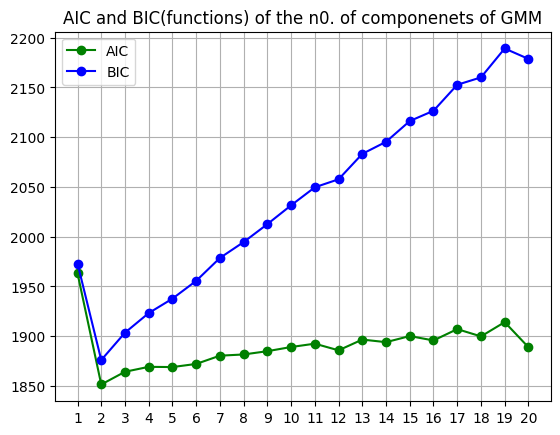

In [18]:
plt.plot(n_components , AIC , 'go-' ,label = 'AIC')
plt.plot(n_components , BIC , 'bo-' ,label = 'BIC')
plt.grid()
plt.xticks(n_components)
plt.title("AIC and BIC(functions) of the n0. of componenets of GMM")
plt.legend()
plt.show()

In [19]:

print("The optimal number of components is 2.")

The optimal number of components is 2.


#Optimum number of models = 2 ,as the BIC value is lowest when number of models are 2.